In [16]:
import os
import pickle
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from stable_baselines.results_plotter import ts2xy
from stable_baselines.bench.monitor import load_results
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

sns.set(style="darkgrid", font_scale=1.5)

In [2]:
algos = ['ppo2', "sac"]
envs = ['RoboschoolHopper-v1', 'LunarLanderContinuous-v2', 'Acrobot-v1']
for env in envs:
    save_path = "logs/{}_analysis/".format(env)
    os.makedirs(save_path, exist_ok=True)

### Compute last 100 episode mean rewards

In [3]:
mean_rewards = defaultdict(list)
for algo in algos:
    for env in envs:
        for env_exp_id in tqdm(os.listdir('logs/{}_scratch'.format(algo))):
            if env in env_exp_id and env_exp_id[-1]=='1':
                # load results of training from scratch
                _, y = ts2xy(load_results("logs/{}_scratch/{}".format(algo, env_exp_id)), 'episodes')
                mean_rewards[env].append(np.mean(y[-100:]))
                

100%|██████████| 300/300 [00:00<00:00, 51185.42it/s]


### Save the results

In [14]:
for model in mean_rewards.keys():
    file = os.path.join(save_path, model + '.pkl')
    if os.path.isfile(file):
        print("{} exists".format(model))
        continue
    with open(file, 'wb') as f:
        pickle.dump(mean_rewards[model], f, pickle.HIGHEST_PROTOCOL)
        print("saved {}".format(model))

saved RoboschoolHopper-v1
saved Acrobot-v1
saved LunarLanderContinuous-v2


### Loading pickles

In [4]:
mean_rewards = {}
for model in os.listdir(save_path):
    file = os.path.join(save_path, model)
    if file[-4:] == '.pkl':
        with open(file, 'rb') as f:
            mean_rewards[model[:-4]] = pickle.load(f)

### Plot results

/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


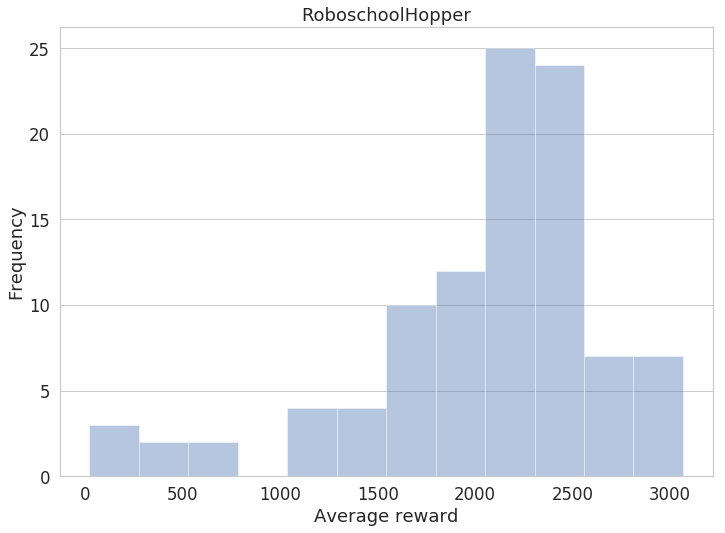

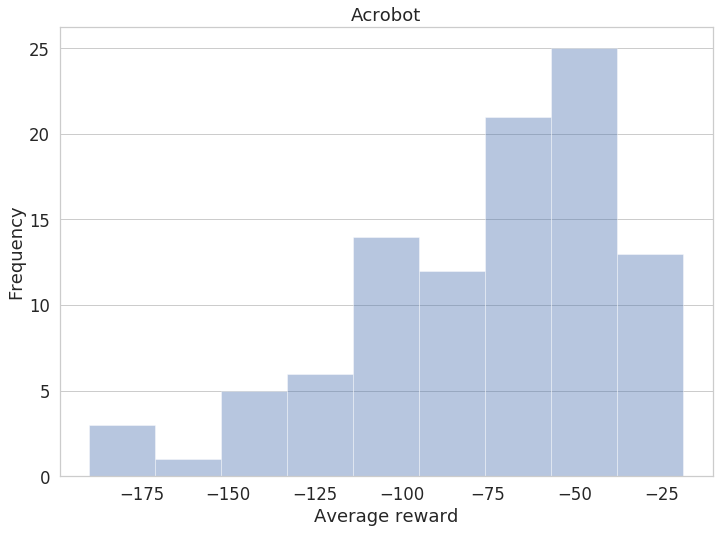

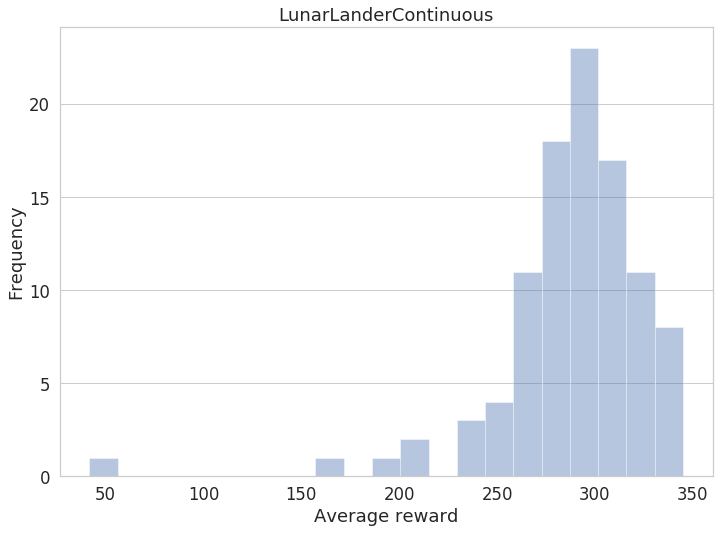

In [46]:
for env in mean_rewards:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set(style="whitegrid", font_scale=1.5)
    ax = sns.distplot(mean_rewards[env], kde= False, norm_hist=False)
    ax.set_title(env[:-3])
    ax.set_xlabel('Average reward')
    ax.set_ylabel('Frequency')
    ax.xaxis.grid(False)
    plt.show()

In [ ]:
ax.grid